In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader import data
from scipy.stats import norm

%matplotlib inline

In [3]:
# # import data
# def get_data(stocks, start, end):
#     stockData = data.DataReader(stocks,'yahoo', start, end)
#     stockData = stockData['Close']
#     returns = stockData.pct_change()
#     meanReturns = returns.mean()
#     covMatrix = create_covar(stockData)
#     return meanReturns, covMatrix

# stockList = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
# stocks = [stock + '.AX' for stock in stockList]
# endDate = dt.datetime.now()
# startDate = endDate - dt.timedelta(days=300)

# meanReturns, covMatrix = get_data(stocks, startDate, endDate)

# weights = np.random.random(len(meanReturns))
# weights /= np.sum(weights)

In [5]:
def get_data(stocks, start, end):
    stockData = data.DataReader(stocks,'yahoo', start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

stocks = ["GNRC", "CPRT", "ODFL", "AMD", "PAYC", "CHTR", "MKC", "PG", "PGR", "NEM", "CCI"]
# stocks = [stock + '.AX' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

meanReturns, covMatrix = get_data(stocks, startDate, endDate)

# weights = np.random.random(len(meanReturns))
# weights /= np.sum(weights)

weights = [0.05,0.1,0.05,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

In [7]:
# def get_data(stocks, start_end, date_end):

tickers = ["GNRC", "CPRT", "ODFL", "AMD", "PAYC", "CHTR", "MKC", "PG", "PGR", "NEM", "CCI"]

start_date = '2000-01-01'
end_date = '2020-01-01'

panel_data = data.DataReader(tickers,'yahoo',start_date,end_date)
panel_data = panel_data['Adj Close']
returns = panel_data.pct_change()
meanReturns = returns.mean()
covMatrix = returns.cov()

weights = [0.05,0.1,0.05,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

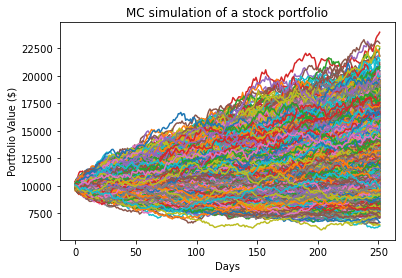

In [8]:
# Monte Carlo Method
mc_sims = 6000 # number of simulations
T = 252 #timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 10000

for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

In [9]:
df = pd.DataFrame(portfolio_sims)

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,9891.463423,9882.922863,10146.007195,9908.924571,9986.718437,10064.793450,10067.850753,9974.130854,9953.745962,9885.153323,...,9945.555267,9967.393912,10218.638344,10032.402450,10034.817895,9937.106610,9999.915051,9901.632241,9944.174229,10058.742522
1,10059.306491,10035.155340,10101.025079,9767.202403,10160.522504,10160.833153,10005.271366,10088.816266,10063.522331,9934.844067,...,9837.634667,9879.051422,10418.255520,10191.434773,9931.612482,9906.867488,10030.096193,9992.269073,10032.550927,10016.929402
2,10189.268751,10134.993025,10129.683957,9666.533617,10249.258396,10135.951534,10194.459308,10168.211910,10172.220889,10084.050826,...,9855.197083,10050.224218,10373.996962,10077.152733,9918.216016,10156.259205,9992.698394,9879.972212,9692.195012,9905.378882
3,10327.609138,10377.121902,10071.060747,9724.404273,10436.974242,10361.255239,10100.058700,10310.687671,10421.901561,9929.392361,...,9956.659892,10156.264065,10282.462104,10046.428108,9969.579464,10156.295265,9975.646631,9638.819460,9647.180519,9756.725113
4,10193.369080,10557.196372,9896.117623,9776.643789,10345.617001,10310.210942,10177.648802,10443.935317,10134.892035,9910.130215,...,9968.561098,10000.950002,10316.579676,9934.628935,10089.424127,10092.248400,10121.483755,9562.256597,9598.012497,9622.029265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,13308.263579,12066.062227,15845.425344,11501.000232,10669.870747,13359.632398,9844.850480,16356.414571,12265.005852,9384.696855,...,16640.822445,10582.787687,14068.609042,17314.906519,15168.128618,10370.550262,14247.372597,12209.973047,9169.083939,10501.427858
248,13001.586081,11922.136688,15837.467742,11666.057241,10554.882759,13663.656580,9610.760036,16524.270005,12308.024655,9406.791867,...,16294.946467,10410.602119,14346.013318,17394.421843,15260.556278,10382.308111,14515.296235,12321.600856,9121.132455,10378.496889
249,13291.387981,12167.145004,15805.499344,11510.740417,10484.676214,13584.930996,9616.529297,16644.776803,12272.179618,9471.965471,...,16509.782847,10239.385470,14260.097589,17340.097588,15045.382250,10340.417757,14352.149616,12407.948653,9136.668119,10128.715564
250,13047.047091,11963.637016,15566.392690,11749.180122,10546.371575,13719.474912,9496.624053,16464.645911,12252.498758,9544.467433,...,16796.522048,10301.551619,14252.928492,17306.584353,15031.780060,10379.075721,14304.956238,12409.038376,9260.780646,10044.200585


In [11]:
percentagelist = []

for i in range(0,6000):
    initial = df[i].iloc[0]
    end = df[i].iloc[251]
    change = ((end-initial)/initial)*100
    percentagelist.append(change)

In [12]:
percentagelist

[32.19600133566015,
 22.25625546880794,
 49.462214331614085,
 17.291258982093243,
 6.84623110628758,
 35.87942930523032,
 -6.174114490826545,
 63.37612356837764,
 23.282334143797087,
 -2.645879582917292,
 39.14640138991459,
 18.50514313316889,
 22.368358146294586,
 25.050795901675176,
 49.92607450395202,
 35.268671092963146,
 2.929711946876573,
 26.672404552540048,
 31.285371222664605,
 49.88203212671673,
 38.108759725666374,
 33.49932220862457,
 28.14882013978216,
 48.071394323787324,
 -9.729629886913033,
 33.55223172680864,
 14.656517991975937,
 23.105185234961965,
 41.92601929308128,
 11.873391915610313,
 35.67803890632686,
 18.80144244831414,
 28.469769021423474,
 41.515648276049085,
 15.184199316386271,
 42.511034446705445,
 18.590233037633197,
 15.882545125597607,
 23.461144865035685,
 -4.431768941487721,
 58.232043756054374,
 25.436275182703156,
 45.78448353102867,
 10.327578384145536,
 56.45650030473579,
 20.922200056057587,
 29.115457331309795,
 29.12462826392277,
 20.66202354

In [13]:
max(percentagelist)

138.288239269455

In [14]:
min(percentagelist)

-36.572126441417346

In [15]:
total = 0
for n in percentagelist:
    total += n
    
avg = total/10000

avg

16.500070196254445

In [16]:
tickers = ["GNRC", "CPRT", "ODFL", "AMD", "PAYC", "CHTR", "MKC", "PG", "PGR", "NEM", "CCI"]

start_date = '2020-01-01'
end_date = '2021-01-01'

panel_data = data.DataReader(tickers,'yahoo',start_date,end_date)

weights = [0.05,0.1,0.05,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

return_series_adj = (panel_data['Adj Close'].pct_change()+ 1).cumprod() - 1

weighted_return_series_test = weights * (return_series_adj)
#Sum the weighted returns for SPY and TLT
return_series_test = weighted_return_series_test.sum(axis=1) #add up the returns from the 2 ETFs

#Plot the weighted returns and individual returns on the same plot for comparison
# fig, ax = plt.subplots(figsize=(16,9))
# ax.plot(return_series_test, label = 'weight_SPY_TLT')

# return_series_adj_spy_tlt.plot(figsize=(16,9))
# ax.plot(return_series_adj['AAPL'] , label = 'SPY')
# ax.plot(return_series_adj['MSFT'] , label = 'TLT')
# ax.plot(return_series_adj['AMZN'] , label = 'TLT')
# ax.plot(return_series_adj['TSLA'] , label = 'TSLA')
# ax.legend()

In [17]:
test_returns = return_series_test.tail(1)
print("Portfolio Return:", test_returns[-1].round(3))

Portfolio Return: 0.459


In [18]:
df.tail(1)

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
251,13076.119119,12082.491424,15164.447021,11622.302381,10670.432261,13675.983901,9446.250121,16295.348349,12271.210357,9623.604069,...,16508.282007,10424.360943,14412.21422,17576.503366,15052.903281,10570.535804,14274.92601,12545.583363,9151.448209,9784.956114


In [19]:
df.iloc[251].mean()

12762.135098610808